# Numpy

[Numpy](https://numpy.org)는 수학 및 과학 계산을 위한 패키지입니다. 수학에서 쓰이는 벡터와 행렬 그리고 그 연산을 쉽게 구현할 수 있고 다른 패키지와의 연관성도 높습니다.

In [1]:
import numpy as np

## 배열 생성

Numpy 배열 생성은 파이썬의 리스트를 통해 이루어집니다. 예를 들어 다음과 같은 $A$라는 행렬을 만드려면 중첩 리스트를 ```np.array()``` 안에 넣습니다. 이는 ```numpy.ndarray```라는 클래스의 객체를 하나 생성합니다.

$ A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix} $

In [2]:
a = np.array([[1, 2, 3], [4, 5 ,6], [7, 8 ,9]])
print(a)
print(type(a))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
<class 'numpy.ndarray'>


```np.array()```외에도 여러가지 배열을 생성하는 방법이 있습니다.

In [3]:
print(np.arange(5)) # 0부터 4까지 1씩 증가하는 배열 (range()와 비슷함)
print(np.zeros((2, 2))) # 2 x 2 0으로 가득 찬 행렬(영행렬)
print(np.ones((2, 3))) # 2 x 3 1로 가득 찬 행렬(유닛행렬)
print(np.eye(3)) # 단위행렬
print(np.full((3, 3), 5)) # 모든 원소가 5


[0 1 2 3 4]
[[0. 0.]
 [0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]


numpy 배열(에는 다양한 속성과 메소드들이 있습니다.
* ```ndarray.size```: 배열 사이즈. 총 원소의 개수
* ```ndarray.ndim```: 배열의 차원. 행렬의 차원과 같음

In [4]:
a = np.array([[1, 2, 3], [4, 5 ,6]])
print(a)
print(a.size)
print(a.ndim)

b = np.zeros((2, 3, 4)) # 2 x 3 x 4 사이즈의 3차원 행렬
print(b.size)
print(b.ndim)

[[1 2 3]
 [4 5 6]]
6
2
24
3


* ```ndarray.shape```: 배열의 형태. m x n 행렬의 크기(사이즈)를 말함. (row, col) 순서

In [5]:
a = np.array([1, 2, 3])
print(a.shape) # 배열의 차원. 1차원이면 (col,) 혹은 (row, col)
b = np.array([[1], [2], [3]])
print(b.shape)
c = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(c.shape)


(3,)
(3, 1)
(3, 3)



* ```ndarray.reshape(shape, order='C')```: 배열을 원하는 shape대로 재배열.

> reshape하는 과정은 다음과 같습니다.
> 
> 1. 배열을 row-major(```order='C'```, C-style) 혹은 column-major(```order='F'```, Fortran-style) 순서로 flattened array(1D array) 형태로 변환. 기본값이 row-major style임
> 2. 그 상태에서 다시 원하는 shape로 재배열. 이때 shape는 (row, col) 형태로 입력해야 하고, row나 col 둘 중 하나가 -1이면 나머지 하나의 값을 기준으로 자동으로 형태를 정함.

In [6]:
a = np.array([[1, 2, 3], [4, 5 ,6]])
print(a.shape)
print(a.reshape((3, 2)))
# print(a.reshape(3, 2)) # 사실 괄호 한번만 써도 됨
print(a.reshape(-1)) # a를 flattened array (1D array)로 변환
print(np.ravel(a)) # 위와 똑같은 함수

b = np.arange(12)
print(b)
print(b.reshape(3, -1)) # 원소가 12개인데 행이 3개이려면 열은 자동으로 12 / 3 = 4개
print(b.reshape(-1, 2)) # 마찬가지로 열이 2개면 행은 자동으로 6개가 됨
# print(b.reshape(5, -1)) # ValueError: cannot reshape array of size 12 into shape (5,newaxis)

(2, 3)
[[1 2]
 [3 4]
 [5 6]]
[1 2 3 4 5 6]
[1 2 3 4 5 6]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]


## 인덱싱 & 슬라이싱

인덱스는 리스트와 마찬가지로 0부터 시작이고, 슬라이싱 문법 역시 리스트와 동일합니다. 다만 [row][col]처럼 접근하는 중첩 리스트와 달리 numpy array는 [row, col]과 같은 형식으로 접근합니다. 

In [7]:
print(a[1, 2])
print(a[:2, :2])
print(a[1:, 1:])
print(a[:, 2]) # row vector
print(a[0, :]) # column vector

6
[[1 2]
 [4 5]]
[[5 6]]
[3 6]
[1 2 3]


## 배열 연산

대학수학이나 공학수학, 선형대수학을 듣지 않았다면 뭔소리인지 모를수도 있는데 나중에 행렬 연산법에 대해 부가설명을 달아놓겠습니다.

### 기본 사칙연산

* ```+, -, *, /```: 각각 ```add(), substract(), multiply(), divide()``` 함수와 동일. 배열의 *요소별(element-wise)* 사칙연산을 수행


In [8]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[2, 4, 6], [8, 10, 12]])

print(a + b)
print(a - b) # 벡터, 행렬의 덧셈은 원래 element-wise
print(5 * a) # 벡터, 행렬의 스칼라곱
print(a * b) # 행렬곱이 아니라 요소별 곱임에 주의
print(a / b)

print(np.add(a, b)) # 더하기(+) 연산자와 동일. 이런걸 연산자 오버로딩(operator overloading)이라고 함

[[ 3  6  9]
 [12 15 18]]
[[-1 -2 -3]
 [-4 -5 -6]]
[[ 5 10 15]
 [20 25 30]]
[[ 2  8 18]
 [32 50 72]]
[[0.5 0.5 0.5]
 [0.5 0.5 0.5]]
[[ 3  6  9]
 [12 15 18]]


### 선형대수 기초

* ```np.dot()```, ```np.inner()```: 벡터의 내적(dot/inner/scalar product). ```dot()```은 행렬곱도 가능하나 다른 방법을 추천

In [9]:
a = np.array([1, 2, 3, 4])
b = np.array([2, 5, 1, 4])
print(np.dot(a, b)) # 1*2 + 2*5 + 3*1 + 4*4
print(np.inner(a, b))

31
31


* ```np.cross()```: 벡터의 외적(cross/vector product)

In [10]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.cross(a, b)) # 3D 벡터의 외적은 벡터

x = np.array([1, 2])
y = np.array([4, 5])
print(np.cross(x, y)) # 2D 벡터의 외적은 z축 성분밖에 없어서 스칼라값이 나옴

[-3  6 -3]
-3


* ```np.outer()```: 다음과 같이 정의되는 outer product를 계산

$$
\textbf{v} = \begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n
\end{bmatrix}
,
\textbf{w} = \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
$$

$$
\textbf{v} \otimes \textbf{w} = 
\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n
\end{bmatrix}
\otimes
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
=
\begin{bmatrix}
v_{1} w_{1} & v_{1} w_{2} & \cdots & v_{1} w_{m} \\
v_{2} w_{1} & v_{2} w_{2} & \cdots & v_{2} w_{m} \\
\vdots & \vdots & \ddots & \vdots \\
v_{n} w_{1} & v_{n} w_{2} & \cdots & v_{n} w_{m}
\end{bmatrix}
$$

$$ \text{using index notation, simply:} $$
$$
(\textbf{v} \otimes \textbf{w})_{ij} = v_iw_j
$$


In [11]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.outer(a, b))

[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


* ```@```: 행렬곱 연산자. ```np.matmul()``` 함수와 동일. 행렬곱은 이 방법 추천

In [12]:
a = np.array([[4, 2], [1, 8]])
b = np.array([[1, 5], [2, 3]])
print(a @ b)
print(np.matmul(a, b))

[[ 8 26]
 [17 29]]
[[ 8 26]
 [17 29]]


* ```ndarray.T```: 전치(Transpose). 행과 열을 뒤바꿈. ```np.transpose()```와 같음
  



In [13]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a.T)
print(np.transpose(a))

[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]


* ```ndarray.trace(), np.trace()```: 대각합(trace)을 계산

$$ A = \begin{bmatrix}
 a_{11} & a_{21} & a_{31} \\
 a_{12} & a_{22} & a_{32} \\
 a_{13} & a_{32} & a_{33}
 \end{bmatrix}
$$

$$ \text{tr}(A) = a_{11} + a_{22} + a_{33} $$
* ```ndarray.diagonal(), np.diag()```: 대각선 성분을 반환하거나 대각행렬을 만듬.

In [14]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a.diagonal())
print(np.diag(a))
print(a.trace())
print(np.trace(a))

print(np.diag([1, 2, 3]))

[1 5 9]
[1 5 9]
15
15
[[1 0 0]
 [0 2 0]
 [0 0 3]]


* ```ndarray.sum(), np.sum()```: 성분들의 합. axis를 지정해서 연산 가능
* ```ndarray.prod(), np.prod()```: 성분들의 곱.

> axis=0는 row-wise 연산, axis=1은 column-wise 연산입니다. 간단히 말해서 axis=0면 세로 방향으로 더하고 axis=1이면 가로 방향으로 더함

In [15]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a.sum()) # 모든 원소의 합
print(a.sum(axis=0)) # row-wise sum
print(a.sum(axis=1)) # column-wise sum

print(a.prod())
print(a.prod(axis=0))
print(a.prod(axis=1))

21
[5 7 9]
[ 6 15]
720
[ 4 10 18]
[  6 120]


### ```numpy.linalg```
* ```np.linalg.norm()```: 벡터, 또는 행렬의 norm을 계산 (모든 원소의 제곱 합의 제곱근)
* ```np.linalg.det()```: 행렬의 행렬식(determinant) 계산
* ```np.linalg.inv()```: 역행렬 계산
* ```np.linalg.solve()```: linear system (행렬 형태의 연립방정식) $$ \textbf{A}\text{x}=\textbf{b} $$의 해를 계산

## 기타 함수들

Numpy에는 배열 관련 함수 말고도 다른 함수들도 많은데 예를 들면 파이썬 기본 모듈인 ```math```모듈처럼 삼각함수, 지수함수, 로그함수 등도 있습니다.

In [16]:
print(np.sin(np.pi / 2))
print(np.log10(100))
print(np.abs(-10))

1.0
2.0
10


또한 여러가지 확률분포를 따르는 난수들을 생성할 수도 있습니다.

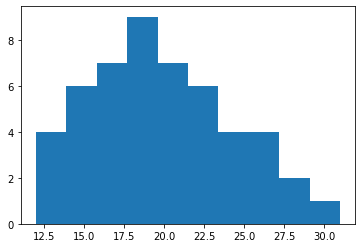

In [17]:
x = np.random.binomial(100, 0.2, size=50)

import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x)